# EV Population Classification

Dataset from https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2/about_data</br>
Kaggle link: https://www.kaggle.com/datasets/usamabuttar/electric-vehicle-population-data-washington-us</br>
Encoding Methods: https://medium.com/@jkkn.iitkgp/categorical-data-encoding-techniques-d6296697a40f

## Notes (About the Dataset)

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

1. A Battery Electric Vehicle (BEV) is an all-electric vehicle using one or more batteries to store the electrical energy that powers the motor and is charged by plugging the vehicle in to an electric power source. A Plug-in Hybrid Electric Vehicle (PHEV) is a vehicle that uses one or more batteries to power an electric motor; uses another fuel, such as gasoline or diesel, to power an internal combustion engine or other propulsion source; and is charged by plugging the vehicle in to an electric power source.
2. Clean Alternative Fuel Vehicle (CAFV) Eligibility is based on the fuel requirement and electric-only range requirement as outlined in RCW 82.08.809 and RCW 82.12.809 to be eligible for Alternative Fuel Vehicles retail sales and Washington State use tax exemptions. Sales or leases of these vehicles must occur on or after 8/1/2019 and meet the purchase price requirements to be eligible for Alternative Fuel Vehicles retail sales and Washington State use tax exemptions.
3. Monthly count of vehicles for a county may change from this report and prior reports. Processes were implemented to more accurately assign county at the time of registration.
4. Electric Range is no longer maintained for Battery Electric Vehicles (BEV) because new BEVs have an electric range of 30 miles or more. Zero (0) will be entered where the electric range has not been researched.

## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## Loading Dataset

In [2]:
# Read CSV file
df = pd.read_csv('./Dataset/ev_population_data.csv')

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


**Columns in the dataset**
* Vin#: The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).
* County: This is the geographic region of a state that a vehicle's owner is listed to reside within. Vehicles registered in Washington state may be located in other states.
* City: The city in which the registered owner resides.
* State: This is the geographic region of the country associated with the record. These addresses may be located in other states.
* Zip: The 5 digit zip code in which the registered owner resides.
* Model Yr: The model year of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
* EV Type: This distinguishes the vehicle as all electric or a plug-in hybrid.
* CAFV Eligibility: This categorizes vehicle as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement in House Bill 2042 as passed in the 2019 legislative session.
* Electric Range: Describes how far a vehicle can travel purely on its electric charge.
* MSRP: This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.
* Leg Dist: The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.
* DOL ID: Unique number assigned to each vehicle by Department of Licensing for identification purposes.
* Vehicle Location: The center of the ZIP Code for the registered vehicle.
* Electric Utility: This is the electric power retail service territories serving the address of the registered vehicle. All ownership types for areas in Washington are included: federal, investor owned, municipal, political subdivision, and cooperative. If the address for the registered vehicle falls into an area with overlapping electric power retail service territories then a single pipe | delimits utilities of same TYPE and a double pipe || delimits utilities of different types. We combined vehicle address and Homeland Infrastructure Foundation Level Database (HIFLD) (https://gii.dhs.gov/HIFLD) Retail_Service_Territories feature layer using a geographic information system to assign values for this field. Blanks occur for vehicles with addresses outside of Washington or for addresses falling into areas in Washington not containing a mapped electric power retail service territory in the source data.
* 2020 Census Tract: The census tract identifier is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census, also known as Geographic Identifier (GEOID). More information can be found here: https://www.census.gov/programs-surveys/geography/about/glossary.html#par_textimage_13 https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

In [5]:
df = df.rename(columns={'VIN (1-10)': 'VIN',
                        'Postal Code': 'ZIP',
                        'Model Year': 'ModYr',
                        'Electric Vehicle Type': 'EVType',
                        'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV',
                        'Electric Range': 'EleRange',
                        'Base MSRP': 'MSRP',
                        'Legislative District': 'LegDist',
                        'DOL Vehicle ID': 'DOLID',
                        'Vehicle Location': 'Location',
                        'Electric Utility': 'EleUtil',
                        '2020 Census Tract': 'CensusTract'})

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   VIN          166800 non-null  object 
 1   County       166795 non-null  object 
 2   City         166795 non-null  object 
 3   State        166800 non-null  object 
 4   ZIP          166795 non-null  float64
 5   ModYr        166800 non-null  int64  
 6   Make         166800 non-null  object 
 7   Model        166800 non-null  object 
 8   EVType       166800 non-null  object 
 9   CAFV         166800 non-null  object 
 10  EleRange     166800 non-null  int64  
 11  MSRP         166800 non-null  int64  
 12  LegDist      166440 non-null  float64
 13  DOLID        166800 non-null  int64  
 14  Location     166790 non-null  object 
 15  EleUtil      166795 non-null  object 
 16  CensusTract  166795 non-null  float64
dtypes: float64(3), int64(4), object(10)
memory usage: 21.6+ MB


In [7]:
# Count unique values for each columns
cols = df.columns
for i in np.arange(0, len(cols)):
    print(f'Unique Values in {cols[i]}: {df[cols[i]].nunique()}')

Unique Values in VIN: 10316
Unique Values in County: 187
Unique Values in City: 704
Unique Values in State: 44
Unique Values in ZIP: 836
Unique Values in ModYr: 22
Unique Values in Make: 39
Unique Values in Model: 138
Unique Values in EVType: 2
Unique Values in CAFV: 3
Unique Values in EleRange: 102
Unique Values in MSRP: 31
Unique Values in LegDist: 49
Unique Values in DOLID: 166800
Unique Values in Location: 835
Unique Values in EleUtil: 76
Unique Values in CensusTract: 2088


**Check the unique ID for this project**

In [8]:
# Confirm DOLID is a unique identifier for each vehicle
dup_did = df[df['DOLID'].duplicated()]
print(dup_did)

Empty DataFrame
Columns: [VIN, County, City, State, ZIP, ModYr, Make, Model, EVType, CAFV, EleRange, MSRP, LegDist, DOLID, Location, EleUtil, CensusTract]
Index: []


**Note:</br>**
DOLID is the unique ID for this dataset.</br>
Records with same VINs won't be dropped because rest of the features are different.

**Missing Values**

In [9]:
# Check missing values from each column
df.isnull().sum()

VIN              0
County           5
City             5
State            0
ZIP              5
ModYr            0
Make             0
Model            0
EVType           0
CAFV             0
EleRange         0
MSRP             0
LegDist        360
DOLID            0
Location        10
EleUtil          5
CensusTract      5
dtype: int64

In [10]:
missing_location = df[df['Location'].isnull()]

# Display the records where 'location' is missing
pd.DataFrame(missing_location)

,VIN,County,City,State,ZIP,ModYr,Make,Model,EVType,CAFV,EleRange,MSRP,LegDist,DOLID,Location,EleUtil,CensusTract
98,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,159850029,NaN,NaN,NaN
100,5YJSA1E21J,NaN,NaN,AE,NaN,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,NaN,220643132,NaN,NaN,NaN
97863,JTDKARFP1H,Pacific,Long Beach,WA,98634.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,19.0,171247282,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
132425,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN
134650,1G1FW6S08N,Pacific,Long Beach,WA,98634.0,2022,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,218102209,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
136489,KNDJX3AE8H,Pacific,Long Beach,WA,98634.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,19.0,106442773,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
137458,KMHE54L2XH,Pacific,Long Beach,WA,98634.0,2017,HYUNDAI,SONATA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,27,0,19.0,245533578,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
139217,1C4JJXP69P,Pacific,Long Beach,WA,98634.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,19.0,254934886,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
140273,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
154970,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,NaN,112277063,NaN,NaN,NaN


In [11]:
# Records to drop
records_to_drop = missing_location.index

# Drop records from the original DataFrame
df = df.drop(records_to_drop)
df.head()

,VIN,County,City,State,ZIP,ModYr,Make,Model,EVType,CAFV,EleRange,MSRP,LegDist,DOLID,Location,EleUtil,CensusTract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [12]:
# Confirm records with missing values are dropped
df.isnull().sum()

VIN              0
County           0
City             0
State            0
ZIP              0
ModYr            0
Make             0
Model            0
EVType           0
CAFV             0
EleRange         0
MSRP             0
LegDist        355
DOLID            0
Location         0
EleUtil          0
CensusTract      0
dtype: int64

In [13]:
# Changed to comment: No longer needed after dropping states
# # Drop rows where ZIP is null
# df.drop(df[df['ZIP'].isnull()].index, inplace=True)
# df.isnull().sum()

## Test

In [14]:
# # Dropping unnecessary columns
# dropped_columns=['DOLID', 'Location', 'EleUtil', 'CensusTract', 'LegDist']
# df = df.drop(columns=dropped_columns)
# df.head()

In [15]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# X = df.drop('CAFV', axis=1)
# y = df['CAFV']

# # Define categorical and numerical columns
# numerical_cols = ['ZIP', 'ModYr', 'EleRange', 'MSRP']
# categorical_cols = [col for col in X.columns if col not in numerical_cols]

# # Preprocessing with ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_cols),
#         ('cat', OneHotEncoder(), categorical_cols)
#     ])

# # Apply preprocessing
# X_processed = preprocessor.fit_transform(X)

# # Train/Test/Split
# X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# # Train the model
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate model performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [16]:
# Dropping unnecessary columns
dropped_columns=['MSRP', 'County', 'City', 'ZIP', 'LegDist', 'DOLID', 'Location', 'EleUtil', 'CensusTract']
df = df.drop(columns=dropped_columns)
df.head()

,VIN,State,ModYr,Make,Model,EVType,CAFV,EleRange
0,3C3CFFGE4E,WA,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87
1,5YJXCBE40H,WA,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200
2,3MW39FS03P,WA,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20
3,7PDSGABA8P,WA,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
4,5YJ3E1EB8L,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322


## Check column with categorical features

**VIN column**

In [17]:
df['VIN'].value_counts()

VIN
7SAYGDEE6P    1114
7SAYGDEE7P    1090
7SAYGDEE8P    1071
7SAYGDEEXP    1071
7SAYGDEE0P    1052
              ... 
WAU8HAF88L       1
1GYKPMRL8R       1
YV4BR0CM2M       1
YV4ED3GKXP       1
YV4ED3GK6P       1
Name: count, Length: 10315, dtype: int64

In [18]:
check_vin = df[df['VIN']=='3C3CFFGE4E'].duplicated
print(check_vin)

<bound method DataFrame.duplicated of                VIN State  ModYr  Make Model                          EVType  \
0       3C3CFFGE4E    WA   2014  FIAT   500  Battery Electric Vehicle (BEV)   
22444   3C3CFFGE4E    WA   2014  FIAT   500  Battery Electric Vehicle (BEV)   
23467   3C3CFFGE4E    WA   2014  FIAT   500  Battery Electric Vehicle (BEV)   
45870   3C3CFFGE4E    WA   2014  FIAT   500  Battery Electric Vehicle (BEV)   
71054   3C3CFFGE4E    WA   2014  FIAT   500  Battery Electric Vehicle (BEV)   
74212   3C3CFFGE4E    WA   2014  FIAT   500  Battery Electric Vehicle (BEV)   
135211  3C3CFFGE4E    WA   2014  FIAT   500  Battery Electric Vehicle (BEV)   
147036  3C3CFFGE4E    WA   2014  FIAT   500  Battery Electric Vehicle (BEV)   

                                           CAFV  EleRange  
0       Clean Alternative Fuel Vehicle Eligible        87  
22444   Clean Alternative Fuel Vehicle Eligible        87  
23467   Clean Alternative Fuel Vehicle Eligible        87  
45870   Cl

In [19]:
def unique_vins(vin_list):
    unique_vins = []

    # Initialize a set to keep track of seen VINs
    seen_vins = set()

    # Loop through the VIN list
    for vin in vin_list:
        # Check if the VIN is not already seen
        if vin not in seen_vins:
            # Add the VIN to the unique list
            unique_vins.append(vin)
            # Add the VIN to the set of seen VINs
            seen_vins.add(vin)

    return unique_vins

In [20]:
unique_vins = unique_vins(df['VIN'])
len(unique_vins)

10315

Question: Frequency Encoding?

In [21]:
# # Calculate frequency of each category
# frequency_map = df['VIN'].value_counts(normalize=True)

# # Map frequencies to the original categories
# df['VIN'] = df['VIN'].map(frequency_map)
# df.head()

In [22]:
# # Check duplicate values for VIN '8' (First record of this df)
# check_vin = df[df['VIN']==8].duplicated
# print(check_vin)

# # Check duplicate values for VIN '0.000024' (First record of this df)
# check_vin = df[df['VIN']==0.000048].duplicated
# print(check_vin)

In [23]:
df = df.drop(columns='VIN')
df.head()

,State,ModYr,Make,Model,EVType,CAFV,EleRange
0,WA,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87
1,WA,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200
2,WA,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20
3,WA,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
4,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322


**State column**

In [24]:
# Check unique values in State column
df['State'].unique()

array(['WA', 'VA', 'CA', 'NC', 'IL', 'MO', 'DC', 'MD', 'SC', 'PA', 'NE',
       'KY', 'TX', 'KS', 'GA', 'CO', 'FL', 'OR', 'AL', 'MI', 'LA', 'NY',
       'NJ', 'IN', 'NV', 'MN', 'OH', 'DE', 'CT', 'HI', 'NH', 'OK', 'AZ',
       'UT', 'MA', 'WY', 'AR', 'IA', 'RI', 'AK', 'ID'], dtype=object)

In [25]:
# Drop all values if the state is not 'WA'
df = df[df['State'] == 'WA']
# Drop 'State' column since we only kept vehicles in 'WA'
df = df.drop(columns='State')
df.head()

,ModYr,Make,Model,EVType,CAFV,EleRange
0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87
1,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200
2,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20
3,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
4,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322


In [26]:
df_WA = df.copy()

**Make column**

In [27]:
df_WA['Make'].unique()

array(['FIAT', 'TESLA', 'BMW', 'RIVIAN', 'CHRYSLER', 'CHEVROLET', 'KIA',
       'FORD', 'TOYOTA', 'NISSAN', 'MITSUBISHI', 'HONDA', 'AUDI', 'JEEP',
       'VOLVO', 'HYUNDAI', 'VOLKSWAGEN', 'SUBARU', 'LUCID', 'MINI',
       'POLESTAR', 'SMART', 'LINCOLN', 'MERCEDES-BENZ', 'LEXUS',
       'PORSCHE', 'ALFA ROMEO', 'DODGE', 'JAGUAR', 'CADILLAC',
       'LAND ROVER', 'MAZDA', 'GENESIS', 'FISKER', 'GMC', 'TH!NK',
       'WHEEGO ELECTRIC CARS', 'AZURE DYNAMICS', 'BENTLEY'], dtype=object)

In [28]:
len(df_WA['Make'].value_counts())

39

**Question: Methods to consider**
1) Downsampling
2) Stratified Sampling

**Model column**

In [29]:
len(df_WA['Model'].unique())

138

**Combine columns?**

In [30]:
df_WA['MM'] = df['Make'] + ' ' + df['Model']
df_WA.head()

,ModYr,Make,Model,EVType,CAFV,EleRange,MM
0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,FIAT 500
1,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,TESLA MODEL X
2,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,BMW 330E
3,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,RIVIAN R1S
4,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,TESLA MODEL 3


In [31]:
# Calculate frequency of each category
frequency_map = df_WA['MM'].value_counts(normalize=True)

# Map frequencies to categories
df_WA['MM_Encoded'] = df_WA['MM'].map(frequency_map)
df_WA = df_WA.drop(columns=['Make', 'Model', 'MM'])

In [32]:
df_WA.head()

,ModYr,EVType,CAFV,EleRange,MM_Encoded
0,2014,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0.004813
1,2017,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0.032541
2,2023,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0.002572
3,2023,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0.009740
4,2020,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0.173323


**EVType column**

In [33]:
df_WA['EVType'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [34]:
ohe = OneHotEncoder()

# Encode 'EVType' column
encoded_features = ohe.fit_transform(df_WA[['EVType']])
# Conver 'EVType' column into a DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out(['EVType']))

# Concatenate
df_encoded = pd.concat([df_WA, encoded_df], axis=1)
# Drop the original column
df_encoded.drop(['EVType'], axis=1, inplace=True)

df_encoded.head()

,ModYr,CAFV,EleRange,MM_Encoded,EVType_Battery Electric Vehicle (BEV),EVType_Plug-in Hybrid Electric Vehicle (PHEV)
0,2014.0,Clean Alternative Fuel Vehicle Eligible,87.0,0.004813,1.0,0.0
1,2017.0,Clean Alternative Fuel Vehicle Eligible,200.0,0.032541,1.0,0.0
2,2023.0,Not eligible due to low battery range,20.0,0.002572,0.0,1.0
3,2023.0,Eligibility unknown as battery range has not b...,0.0,0.009740,1.0,0.0
4,2020.0,Clean Alternative Fuel Vehicle Eligible,322.0,0.173323,1.0,0.0


**CAFV column: Target**

In [35]:
le = LabelEncoder()

df_encoded['CAFV_encoded'] = le.fit_transform(df_encoded[['CAFV']])
df_encoded = df_encoded.drop(columns='CAFV')

df_encoded.head()

,ModYr,EleRange,MM_Encoded,EVType_Battery Electric Vehicle (BEV),EVType_Plug-in Hybrid Electric Vehicle (PHEV),CAFV_encoded
0,2014.0,87.0,0.004813,1.0,0.0,0
1,2017.0,200.0,0.032541,1.0,0.0,0
2,2023.0,20.0,0.002572,0.0,1.0,2
3,2023.0,0.0,0.009740,1.0,0.0,1
4,2020.0,322.0,0.173323,1.0,0.0,0


0: Clean Alternative Fuel Vehicle Eligible
1: Eligibility unknown as battery range has not been researched
2: Not eligible due to low battery range

## Visualization

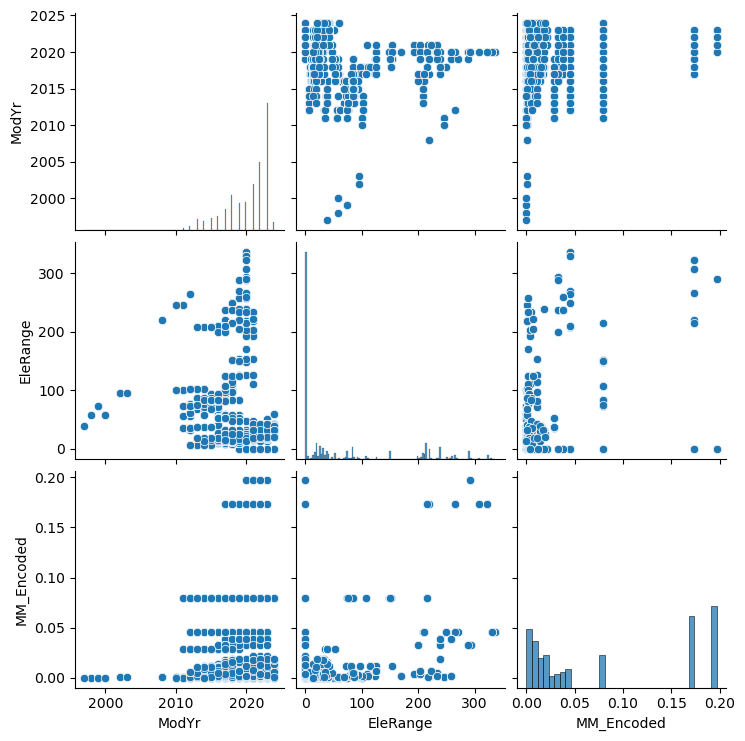

In [36]:
sns.pairplot(df_WA)

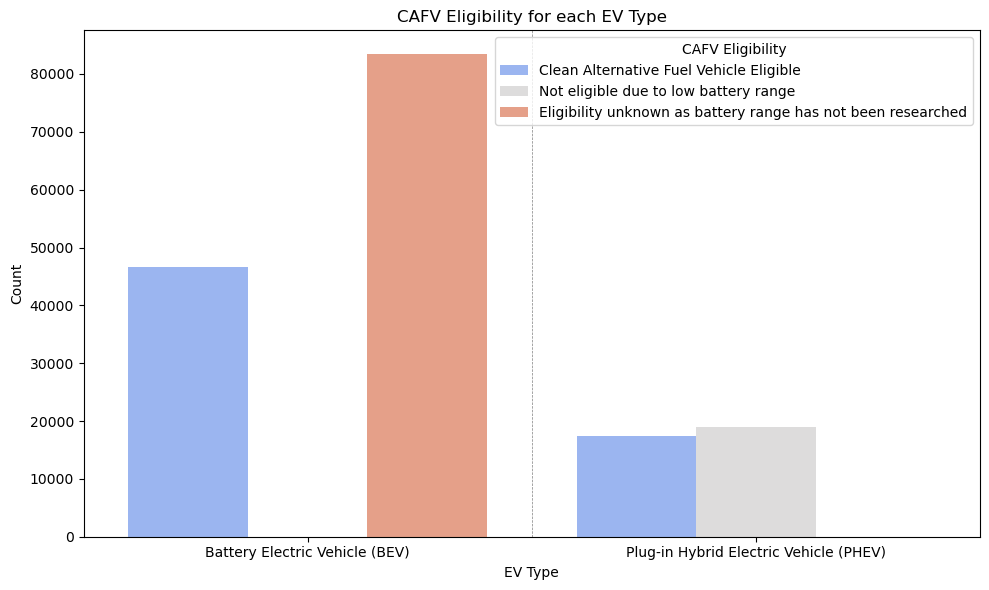

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EVType', hue='CAFV', data=df, palette='coolwarm')
plt.title('CAFV Eligibility for each EV Type')
plt.xlabel('EV Type')
plt.ylabel('Count')
plt.legend(title='CAFV Eligibility', loc='upper right')

# Separation line between the EV Type
for i in range(len(df['EVType'].unique()) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

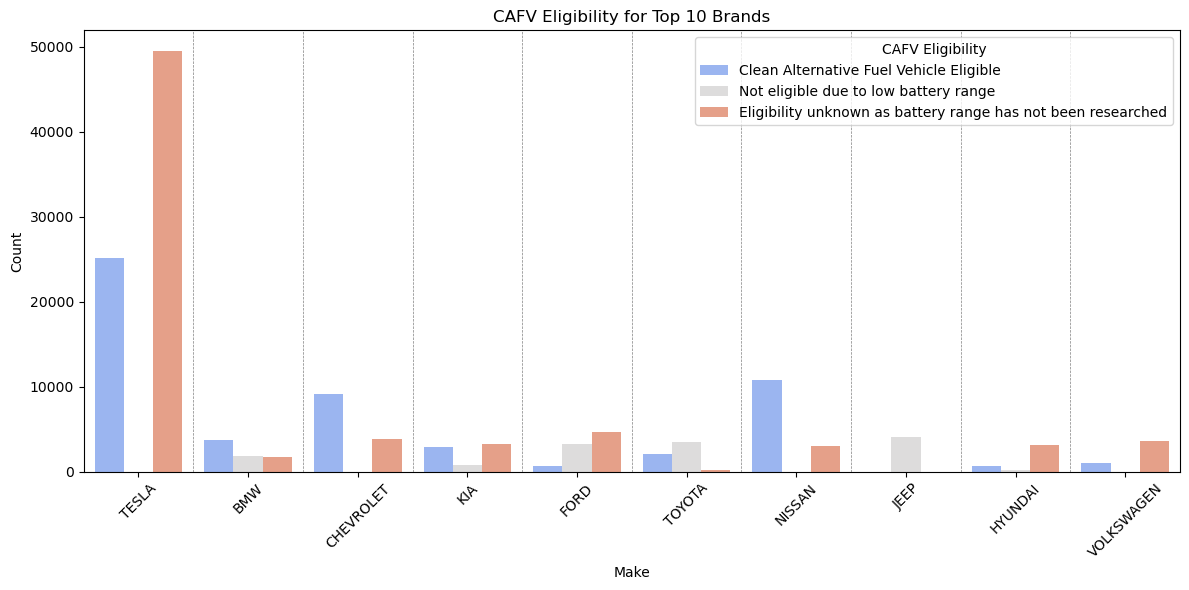

In [38]:
# Used original df for visualization purpose

# Get the top 10 brands by count
top_10_brands = df['Make'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
df_top_10 = df[df['Make'].isin(top_10_brands)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Make', hue='CAFV', data=df_top_10, palette='coolwarm')
plt.title('CAFV Eligibility for Top 10 Brands')
plt.xlabel('Make')
plt.ylabel('Count')
plt.legend(title='CAFV Eligibility', loc='upper right')

# Separation line between the brands
for i in range(len(top_10_brands) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.5)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

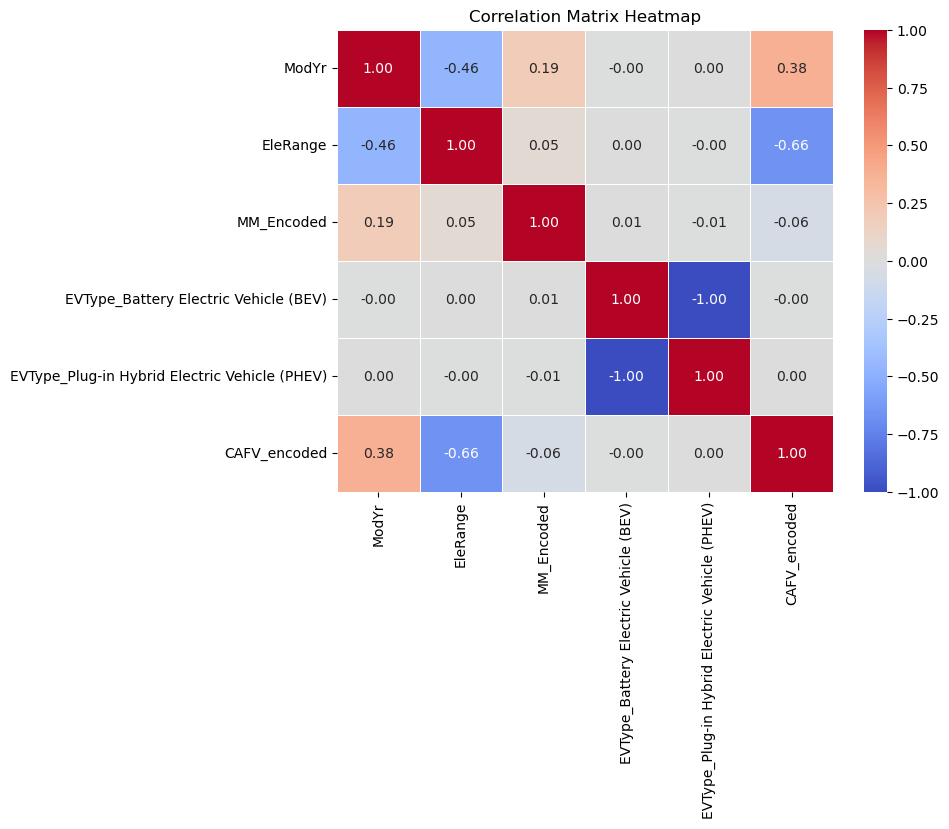

In [39]:
df_corr = df_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()